<div align=center>

</div>

# Using MIMIQ Circuits

Only needed on Google Colab. It will install the required libraries.

In [1]:
!pip3 --quiet install "mimiqcircuits[visualization]" > /dev/null

Import the necessary libraries

In [2]:
from mimiqcircuits import *

# Circuit Creation

## Step 1: Initialize and empty circuit

In [3]:
c = Circuit()

## Step 2: Add a single gate to the circuit

In [4]:
c.push(GateH(), 0)

1-qubit circuit with 1 instructions:
└── H @ q[0]

A Hadamard gate has been added to the specified qubit. Remember, in Python indices (and qubit indices) starts from `0`.

## Step 3: Get quick information about the gate

This will display quick information about the Hadamard gate. The quick help is a Jupyter feature. It is available for most of the classes and functions of MIMIQ circuits.

## Step 4: Add more gates together

We can add the same gates multiple times on different qubits in a single instruction.

In [5]:
c.push(GateCX(), 0, range(1,10))

10-qubit circuit with 10 instructions:
├── H @ q[0]
├── CX @ q[0], q[1]
├── CX @ q[0], q[2]
├── CX @ q[0], q[3]
├── CX @ q[0], q[4]
├── CX @ q[0], q[5]
├── CX @ q[0], q[6]
├── CX @ q[0], q[7]
├── CX @ q[0], q[8]
└── CX @ q[0], q[9]

The syntax can be summarized by:

```
for i in range(1,10):
    c.push(GateCX(), 0, i)
```

In more complex cases, if `v, s, t` are iterables, and `a, b` are single indices, then `c.push(<some gate>, a, v, s, b, t)` will be translated to

```
for i in range(ml):
    c.push(<some gate>, a, v[i], s[i], b, t[i])
```

where `ml` is the minimum length between `v, s, t`.

## Step 5: The constructed circuit

In [6]:
c

10-qubit circuit with 10 instructions:
├── H @ q[0]
├── CX @ q[0], q[1]
├── CX @ q[0], q[2]
├── CX @ q[0], q[3]
├── CX @ q[0], q[4]
├── CX @ q[0], q[5]
├── CX @ q[0], q[6]
├── CX @ q[0], q[7]
├── CX @ q[0], q[8]
└── CX @ q[0], q[9]

# Execution on MIMIQ Remote Services

## Step 6: Create a connection to the remote services and Connect

In [7]:
conn = MimiqConnection(url="https://mimiq.qperfect.io/api")

*WARNING* connecting without any username, password or authentication token will open a local browser window or tab, asking for credentials. If not click on the link returned by `conn.connect()`. It should state something like:

```
Starting authentication server on port XXXXX (http://localhost:XXXXX)
```

In [8]:
conn.connect("zavoli.lorenzo.lz@gmail.com", "mimpaloruni10")

Connection:
├── url: https://mimiq.qperfect.io/api
├── Computing time: 14/3000 minutes
├── Max time limit per request: 180 minutes
├── Default time limit is equal to max time limit: 180 minutes
└── status: open

We can check if the connection is open by using the `isOpen()` method. Take a look at the documentation for the `MimiqConnection` class, for futher information.

In [9]:
conn.isOpen()

True

If the cell above returns `True`, you should have established a connection to the remote services.

## Step 7: Send the circuit for execution

In [10]:
job_id = conn.execute(c, bitstrings=[BitString('0000000000')])
job_id

'67c589c6a3b6e38acafdbe5a'

The quantum circuit is now submitted for execution on the remote services, and you have the job_id to track its progress.

## Step 8: Visualize informations about the execution

In [11]:
# checks if the job has started its execution on the remote services
conn.isJobStarted(job_id)

False

In [12]:
# checks if the job has finished its execution on the remote services
# both cases (success or failure) are accounted.
conn.isJobDone(job_id)

False

In [13]:
# checks if the job has finished its execution with a failure on the remote services
conn.isJobFailed(job_id)

False

The full informations about the job is accessible easily using the `requestinfo` method.

In [14]:
conn.requestInfo(job_id)

{'creationDate': 1740999110277,
 'id': '67c589c6a3b6e38acafdbe5a',
 'label': 'pyapi_v0.15.7',
 'name': 'auto',
 'runningDate': 1740999110501,
 'status': 'RUNNING',
 'hasDeletedUploadFiles': False,
 'hasDeletedResultFiles': False,
 'numberOfUploadedFiles': 3,
 'weightOfUploadedFiles': 489,
 'numberOfResultedFiles': 0,
 'weightOfResultedFiles': 0}

## Step 9: Retrieve the job

The method `get_results()` will block execution and wait for the results from the remote service. It will check if the job finished, and the results are available every second (by default). This interval can be changed with the `interval` keyword argument (e.g. `conn.get_results(job_id, interval=10)` for checking every 10 seconds).

In [15]:
res = conn.get_result(job_id)
res

QCSResults:
├── simulator: MIMIQ-StateVector 0.18.2
├── timings:
│    ├── parse time: 0.000233122s
│    ├── apply time: 8.8104e-05s
│    ├── total time: 0.0006214160000000001s
│    ├── amplitudes time: 9.163e-06s
│    ├── compression time: 1.6133e-05s
│    └── sample time: 0.000146745s
├── fidelity estimate: 1
├── average multi-qubit gate error estimate: 0
├── most sampled:
│    ├── bs"1111111111" => 517
│    └── bs"0000000000" => 483
├── 1 executions
├── 1 amplitudes
└── 1000 samples

## Step 10: Plot the histogram of samples

In [16]:
from mimiqcircuits.visualization import *

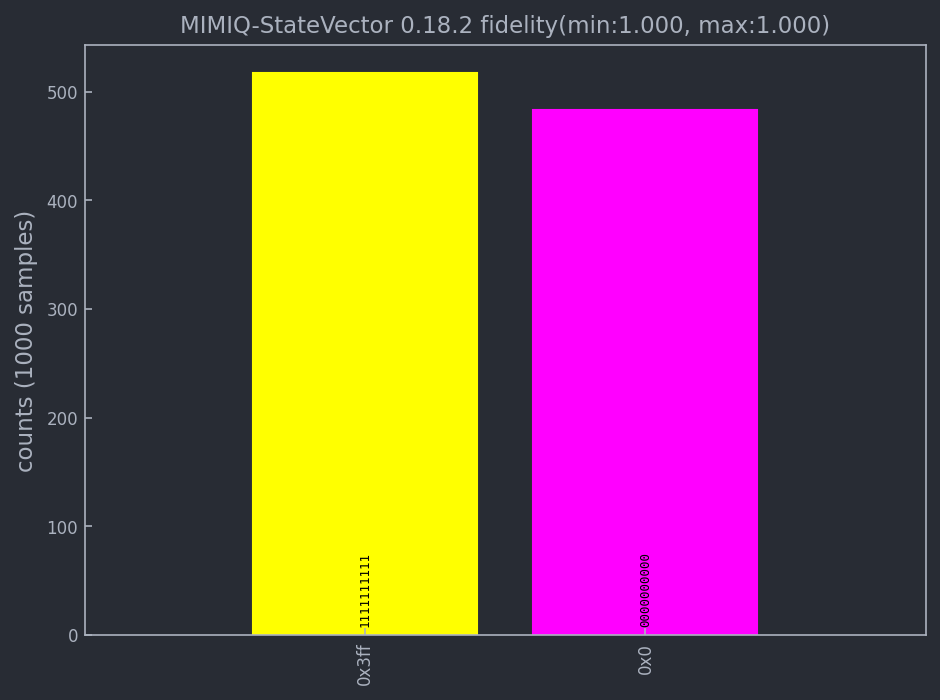

In [17]:
plothistogram(res);

## Sep 11: Larger circuits

In [18]:
c50 = Circuit()
c50.push(GateH(), 0)
c50.push(GateCX(), 0, range(1,50))
c50

50-qubit circuit with 50 instructions:
├── H @ q[0]
├── CX @ q[0], q[1]
├── CX @ q[0], q[2]
├── CX @ q[0], q[3]
├── CX @ q[0], q[4]
├── CX @ q[0], q[5]
├── CX @ q[0], q[6]
├── CX @ q[0], q[7]
├── CX @ q[0], q[8]
├── CX @ q[0], q[9]
├── CX @ q[0], q[10]
├── CX @ q[0], q[11]
├── CX @ q[0], q[12]
├── CX @ q[0], q[13]
├── CX @ q[0], q[14]
├── CX @ q[0], q[15]
├── CX @ q[0], q[16]
├── CX @ q[0], q[17]
├── CX @ q[0], q[18]
⋮   ⋮
└── CX @ q[0], q[49]

In [19]:
job50 = conn.execute(c50)
res50 = conn.get_result(job50)
res50

QCSResults:
├── simulator: MIMIQ-MPS 0.17.2
├── timings:
│    ├── parse time: 0.000508323s
│    ├── apply time: 0.470594255s
│    ├── total time: 0.507314068s
│    ├── amplitudes time: 2.38e-07s
│    ├── compression time: 0.035836303s
│    └── sample time: 0.000119824s
├── fidelity estimate: 1
├── average multi-qubit gate error estimate: 6.43e-16
├── most sampled:
│    ├── bs"00000000000000000000000000000000000000000000000000" => 510
│    └── bs"11111111111111111111111111111111111111111111111111" => 490
├── 1 executions
├── 0 amplitudes
└── 1000 samples

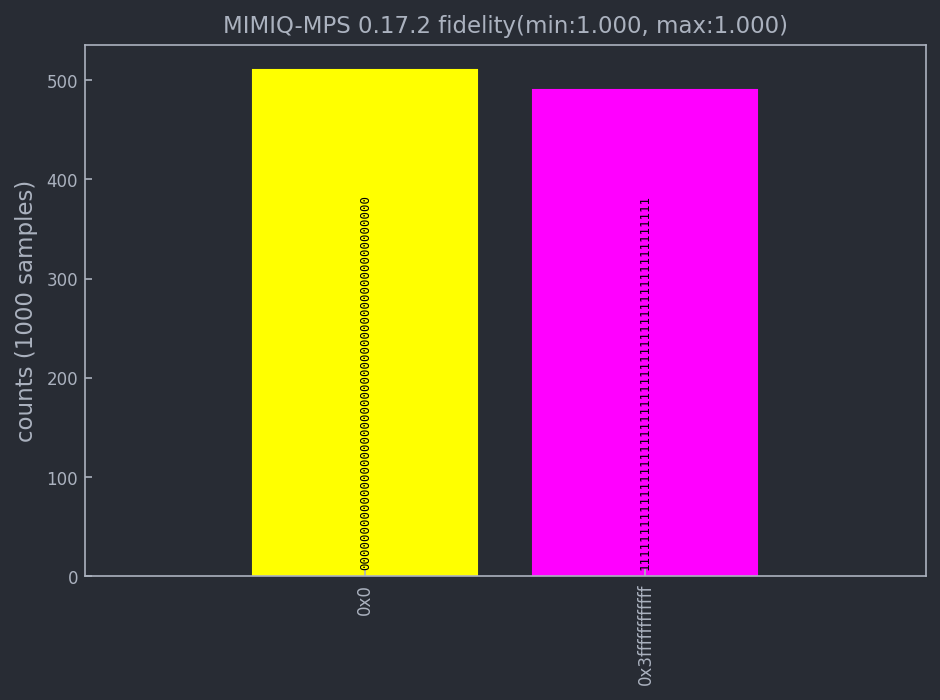

In [20]:
plothistogram(res50);

In [21]:
c100 = Circuit()
c100.push(GateH(), 0)
c100.push(GateCX(), 0, range(1,100))
c100

100-qubit circuit with 100 instructions:
├── H @ q[0]
├── CX @ q[0], q[1]
├── CX @ q[0], q[2]
├── CX @ q[0], q[3]
├── CX @ q[0], q[4]
├── CX @ q[0], q[5]
├── CX @ q[0], q[6]
├── CX @ q[0], q[7]
├── CX @ q[0], q[8]
├── CX @ q[0], q[9]
├── CX @ q[0], q[10]
├── CX @ q[0], q[11]
├── CX @ q[0], q[12]
├── CX @ q[0], q[13]
├── CX @ q[0], q[14]
├── CX @ q[0], q[15]
├── CX @ q[0], q[16]
├── CX @ q[0], q[17]
├── CX @ q[0], q[18]
⋮   ⋮
└── CX @ q[0], q[99]

In [22]:
job100 = conn.execute(c100)
res100 = conn.get_result(job100)
res100

QCSResults:
├── simulator: MIMIQ-MPS 0.17.2
├── timings:
│    ├── parse time: 0.00076469s
│    ├── apply time: 0.016538627s
│    ├── total time: 0.161982178s
│    ├── amplitudes time: 2.88e-07s
│    ├── compression time: 0.144299803s
│    └── sample time: 0.000185243s
├── fidelity estimate: 1
├── average multi-qubit gate error estimate: 2.01e-15
├── most sampled:
│    ├── bs"0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000" => 516
│    └── bs"1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111" => 484
├── 1 executions
├── 0 amplitudes
└── 1000 samples

# Using an OpenQASM file

## Step 11: Retrieve the OpenQASM file

In [23]:
qasm = """
// Name of Experiment: W-state v1

OPENQASM 2.0;
include "qelib1.inc";


qreg q[3];
creg c[3];
gate cH a,b {
h b;
sdg b;
cx a,b;
h b;
t b;
cx a,b;
t b;
h b;
s b;
x b;
s a;
 }

u3(1.91063,0,0) q[0];
cH q[0],q[1];
ccx q[0],q[1],q[2];
x q[0];
x q[1];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];

"""

In [24]:
with open("wstate_n3.qasm", "w") as f:
    f.write(qasm)

In [25]:
job_qasm = conn.execute("wstate_n3.qasm", algorithm="statevector")

In [26]:
res_qasm = conn.get_result(job_qasm, interval=0.1)
res_qasm.timings

{'parse': 0.001947436,
 'apply': 7.8806e-05,
 'total': 0.002584447,
 'amplitudes': 1.2e-07,
 'compression': 0.000182437,
 'sample': 0.000209603}

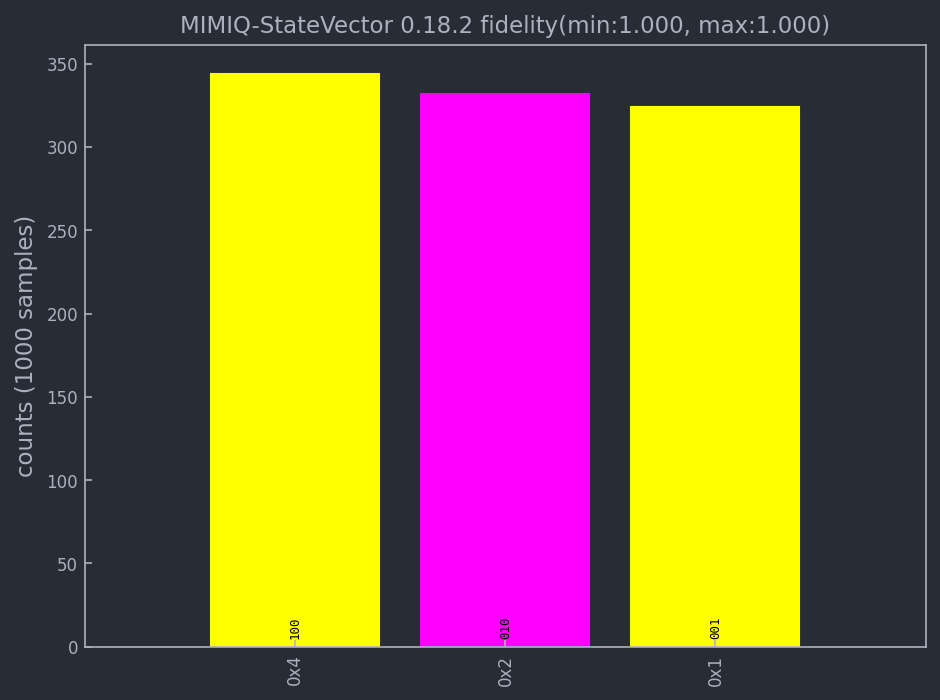

In [27]:
plothistogram(res_qasm);

# Complex Gates

Here we show an example on how to decompose some complex gates. For more informations, visit [https://docs.qperfect.io](https://docs.qperfect.io)

## Quantum Fourier Transform

In [28]:
cqft = Circuit().push(QFT(10), *range(10))
cqft

10-qubit circuit with 1 instructions:
└── QFT @ q[0,1,2,3,4,5,6,7,8,9]

In [29]:
cqft.decompose()

10-qubit circuit with 55 instructions:
├── H @ q[9]
├── CP(0.5*pi) @ q[8], q[9]
├── H @ q[8]
├── CP(0.25*pi) @ q[7], q[9]
├── CP(0.5*pi) @ q[7], q[8]
├── H @ q[7]
├── CP(0.125*pi) @ q[6], q[9]
├── CP(0.25*pi) @ q[6], q[8]
├── CP(0.5*pi) @ q[6], q[7]
├── H @ q[6]
├── CP(0.0625*pi) @ q[5], q[9]
├── CP(0.125*pi) @ q[5], q[8]
├── CP(0.25*pi) @ q[5], q[7]
├── CP(0.5*pi) @ q[5], q[6]
├── H @ q[5]
├── CP(0.03125*pi) @ q[4], q[9]
├── CP(0.0625*pi) @ q[4], q[8]
├── CP(0.125*pi) @ q[4], q[7]
├── CP(0.25*pi) @ q[4], q[6]
⋮   ⋮
└── H @ q[0]